In [169]:
# Libraries 
import time
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ranksums
from BayesNet import BayesNet
from BNReasoner import BNReasoner
from matplotlib import pyplot as plt

# Set the path to the BIFXML file
# path = 'testing/lecture_example.BIFXML'
path = 'testing/dog_problem.BIFXML'

# Load the network
net = BayesNet()
bn = BNReasoner(net)
net.load_from_bifxml(path)


## Network Structure

---

#### We first take a look at the original structure of the BN.

---

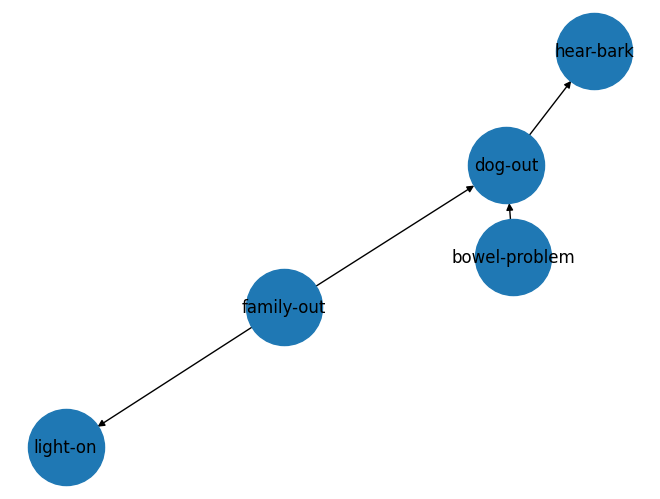

In [170]:
# Get the nodes in the network
net.get_all_variables()

# Draw the network
net.draw_structure()


## Experiment 1: Comparison of order heuristics for pruned and unpruned networks

---

##### We ran 1000 experiments for retrieving a pruned versus an unpruned network for each of the three order heuristics.


---

In [171]:
def heuristic_test(query, evidence, method, heuristic, pruned = True):
    times = []
    for i in range(1000):
        start = time.process_time()
        solution = bn.md_MAP_MPE(query, evidence, method, heuristic, pruned)
        end = time.process_time()
        times.append(end-start)
    return pd.DataFrame(times, columns = ['time'])

# Random Heuristic
random_pruned = heuristic_test(['light-on'], {'hear-bark': True}, "marginal", "random")
random_NOTpruned = heuristic_test(['light-on'], {'hear-bark': True}, "marginal", "random", False)

# Min_degree Heuristic
mindegree_pruned = heuristic_test(['light-on'], {'hear-bark': True}, "marginal", "mindegree")
mindegree_NOTpruned = heuristic_test(['light-on'], {'hear-bark': True}, "marginal", "mindegree", False)

# Min_fill Heuristic
minfill_pruned = heuristic_test(['light-on'], {'hear-bark': True}, "marginal", "minfill")
minfill_NOTpruned = heuristic_test(['light-on'], {'hear-bark': True}, "marginal", "minfill", False)

## Significance Tests

---

##### We then test the runtime of the 1000 experiments for the following comparisons:
1. Unruned versus Pruned
2. Order heuristics comparison for unpruned BNs
3. Order heuristics comparison for pruned BNs

However, before we do that we test if the data is normally distributed with a Shapiro-Wilk test, followed up with Density plots (where the data should be normally distributed), and Q-Q plots where the red dots should be on the blue line in order for the data to be noramlly distributed.

---

In [172]:
#### COMPARISON Mindegree vs. Minfill Pruned vs not pruned ####

# Shapiro wilk test (significant p-value => not normally distributed)
stats.shapiro(random_pruned['time'])   
stats.shapiro(random_NOTpruned['time'])    
stats.shapiro(mindegree_pruned['time'])      
stats.shapiro(mindegree_NOTpruned['time'])       
stats.shapiro(minfill_pruned['time'])
stats.shapiro(minfill_NOTpruned['time'])

# Print the results
print("Results of the pruned random heuristic normally distributed?: ", stats.shapiro(random_pruned['time'])[1] > 0.05, ", Because p-value: ", stats.shapiro(random_pruned['time'])[1])
print("Results of the unpruned random heuristic normally distributed: ", stats.shapiro(random_NOTpruned['time'])[1] > 0.05, ", Because p-value: ", stats.shapiro(random_NOTpruned['time'])[1])
print("Results of the pruned mindegree heuristic normally distributed: ", stats.shapiro(mindegree_pruned['time'])[1] > 0.05, ", Because p-value: ", stats.shapiro(mindegree_pruned['time'])[1])
print("Results of the unpruned mindegree heuristic normally distributed: ", stats.shapiro(mindegree_NOTpruned['time'])[1] > 0.05, ", Because p-value: ", stats.shapiro(mindegree_NOTpruned['time'])[1])
print("Results of the pruned minfill heuristic normally distributed: ", stats.shapiro(minfill_pruned['time'])[1] > 0.05, ", Because p-value: ", stats.shapiro(minfill_pruned['time'])[1])
print("Results of the unpruned minfill heuristic normally distributed: ", stats.shapiro(minfill_NOTpruned['time'])[1] > 0.05, ", Because p-value: ", stats.shapiro(minfill_NOTpruned['time'])[1])

Results of the pruned random heuristic normally distributed?:  False , Because p-value:  0.0
Results of the unpruned random heuristic normally distributed:  False , Because p-value:  5.059375851601544e-08
Results of the pruned mindegree heuristic normally distributed:  False , Because p-value:  8.458517557181396e-34
Results of the unpruned mindegree heuristic normally distributed:  False , Because p-value:  4.93617866596732e-31
Results of the pruned minfill heuristic normally distributed:  False , Because p-value:  8.85953127480287e-30
Results of the unpruned minfill heuristic normally distributed:  False , Because p-value:  6.67378299895169e-29


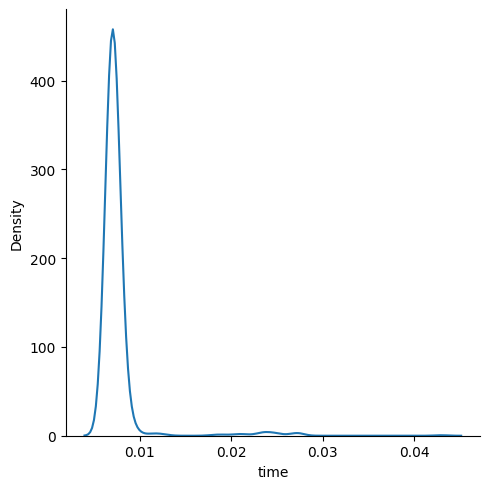

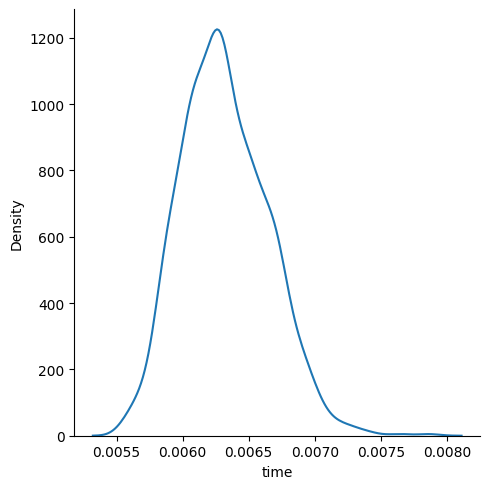

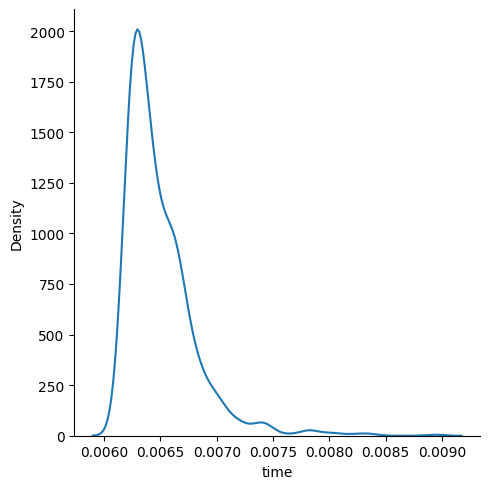

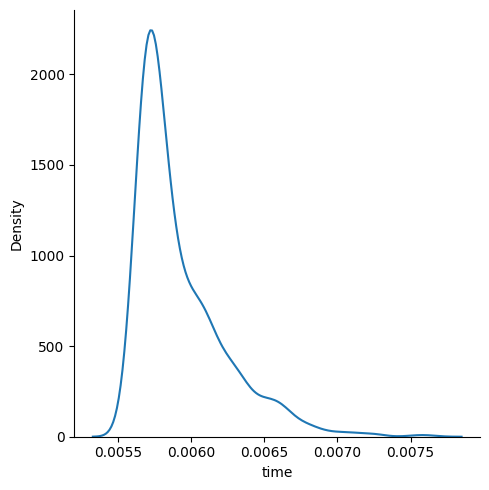

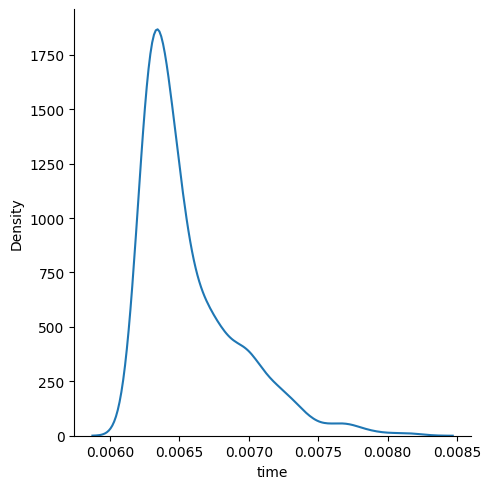

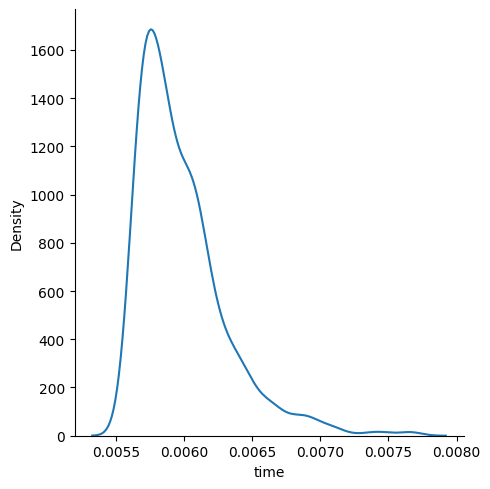

In [173]:
# Density plots --> To check if the data is normally distributed
sns.displot(random_pruned, x = "time", kind="kde")
sns.displot(random_NOTpruned, x = "time", kind="kde")
sns.displot(mindegree_pruned, x = "time", kind="kde")
sns.displot(mindegree_NOTpruned, x = "time", kind="kde")
sns.displot(minfill_pruned, x = "time", kind="kde")
sns.displot(minfill_NOTpruned, x = "time", kind="kde")

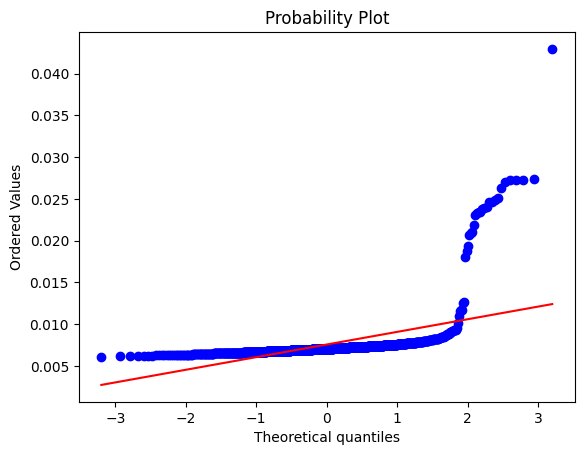

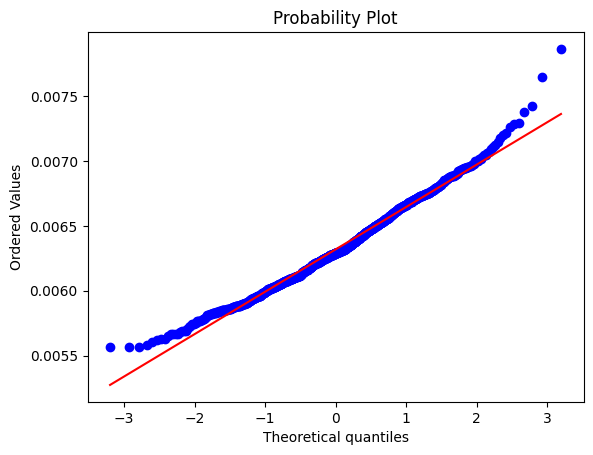

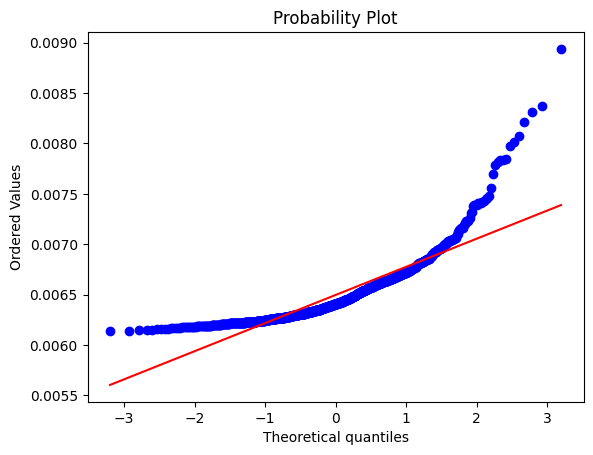

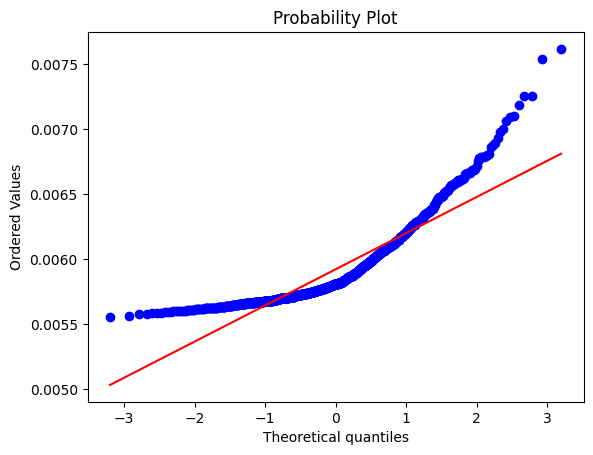

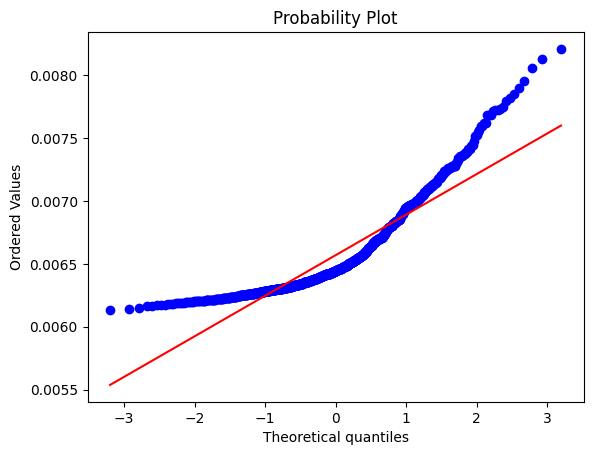

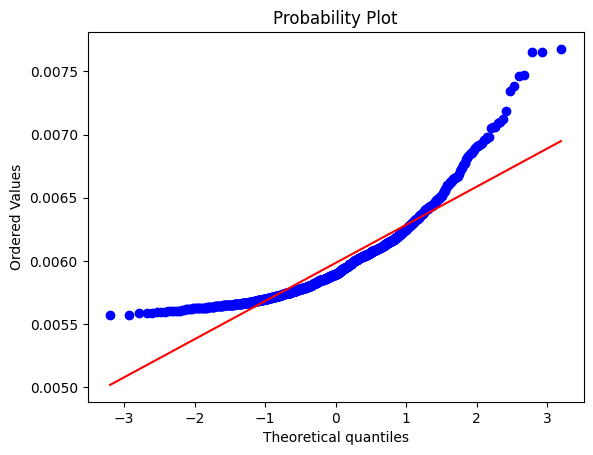

In [174]:
# Check the Q-Q plots --> Also to check if the data is normally distributed
stats.probplot(random_pruned['time'], dist="norm", plot=plt)
plt.show()
stats.probplot(random_NOTpruned['time'], dist="norm", plot=plt)
plt.show()
stats.probplot(mindegree_pruned['time'], dist="norm", plot=plt)
plt.show()
stats.probplot(mindegree_NOTpruned['time'], dist="norm", plot=plt)
plt.show()
stats.probplot(minfill_pruned['time'], dist="norm", plot=plt)
plt.show()
stats.probplot(minfill_NOTpruned['time'], dist="norm", plot=plt)
plt.show()

## Results

---

##### Results of the following comparisons:
1. Unruned versus Pruned
2. Order heuristics comparison for unpruned BNs
3. Order heuristics comparison for pruned BNs


---

In [175]:
# Significance test for all comparisons

# Pruned vs. not pruned
ranksums(random_pruned['time'], random_NOTpruned['time'])
ranksums(mindegree_pruned['time'], mindegree_NOTpruned['time'])
ranksums(minfill_pruned['time'], minfill_NOTpruned['time'])

display(pd.DataFrame([ranksums(random_pruned['time'], random_NOTpruned['time']), 
                      ranksums(mindegree_pruned['time'], mindegree_NOTpruned['time']), 
                      ranksums(minfill_pruned['time'], minfill_NOTpruned['time'])], 
                      index = ['random', 'mindegree', 'minfill'], 
                      columns = ['statistic', 'p-value']).style.set_caption('Comparison pruned vs. unpruned'))

# Order heuristics pruned
ranksums(random_pruned['time'], mindegree_pruned['time'])
ranksums(mindegree_pruned['time'], minfill_pruned['time'])
ranksums(minfill_pruned['time'], random_pruned['time'])

display(pd.DataFrame([ranksums(random_pruned['time'], mindegree_pruned['time']), 
                      ranksums(mindegree_pruned['time'], minfill_pruned['time']), 
                      ranksums(minfill_pruned['time'], random_pruned['time'])], 
                      index = ['random-mindegree', 'mindegree-minfill', 'minfill-random'], 
                      columns = ['statistic', 'p-value']).style.set_caption('Comparison order heuristics pruned'))

# Order heuristics unpruned
ranksums(random_NOTpruned['time'], mindegree_NOTpruned['time'])
ranksums(mindegree_NOTpruned['time'], minfill_NOTpruned['time'])
ranksums(minfill_NOTpruned['time'], random_NOTpruned['time'])

display(pd.DataFrame([ranksums(random_NOTpruned['time'], mindegree_NOTpruned['time']), 
                      ranksums(mindegree_NOTpruned['time'], minfill_NOTpruned['time']), 
                      ranksums(minfill_NOTpruned['time'], random_NOTpruned['time'])], 
                      index = ['random-mindegree', 'mindegree-minfill', 'minfill-random'], 
                      columns = ['statistic', 'p-value']).style.set_caption('Comparison order heuristics unpruned'))

,statistic,p-value
random,33.208921,0.000000
mindegree,32.274720,0.000000
minfill,32.058275,0.000000


,statistic,p-value
random-mindegree,30.044633,0.000000
mindegree-minfill,-5.061886,0.000000
minfill-random,-26.311429,0.000000


,statistic,p-value
random-mindegree,25.567499,0.000000
mindegree-minfill,-5.388529,0.000000
minfill-random,-22.656324,0.000000


## Plots of the results

---

##### We then plotted the results for the following comparisons
1. Unruned versus Pruned
2. Order heuristics comparison for unpruned BNs
3. Order heuristics comparison for pruned BNs

---

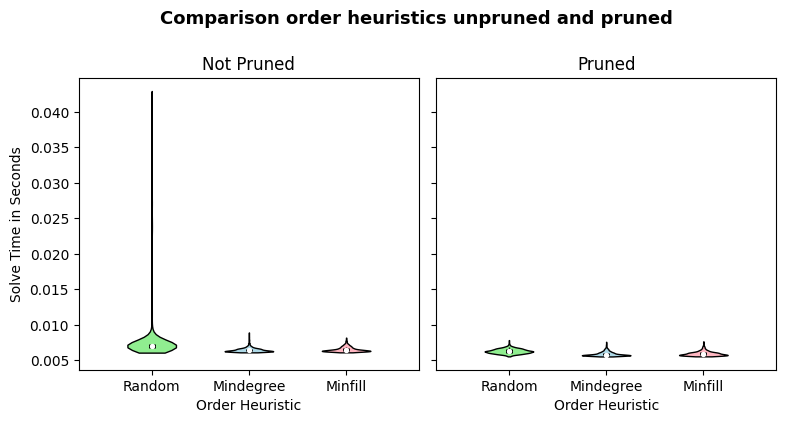

In [176]:
# Plot pruned vs. unpruned

# Function to calculate the quartiles
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])
    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

# Function to set the style of the boxplot
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Order Heuristic')

# Create the test data
data1 = [random_pruned['time'].tolist(), mindegree_pruned['time'].tolist(), minfill_pruned['time'].tolist()] 
data2 = [random_NOTpruned['time'].tolist(), mindegree_NOTpruned['time'].tolist(), minfill_NOTpruned['time'].tolist()]      

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)
fig.suptitle('Comparison order heuristics unpruned and pruned', fontsize=13, fontweight='bold', y=1.05)

ax1.set_title('Not Pruned')
ax1.set_ylabel('Solve Time in Seconds')
parts1 = ax1.violinplot(
        data1, showmeans=False, showmedians=False,
        showextrema=False)

# fill with colors
colors = ['lightgreen', 'lightblue', 'lightpink']
for bplot in parts1:
    for patch, color in zip(parts1['bodies'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_alpha(1)
    
quartile1, medians, quartile3 = np.percentile(data1, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data1, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax1.scatter(inds, medians, marker='o', color='white', s=8, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax1.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

ax2.set_title('Pruned')
parts2 = ax2.violinplot(
        data2, showmeans=False, showmedians=False,
        showextrema=False)

# Fill with colors
colors = ['lightgreen', 'lightblue', 'lightpink']
for bplot in parts2:
    for patch, color in zip(parts2['bodies'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data2, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data2, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax2.scatter(inds, medians, marker='o', color='white', s=8, zorder=3)
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax2.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# Set style for the axes
labels = ['Random', 'Mindegree', 'Minfill']
for ax in [ax1, ax2]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

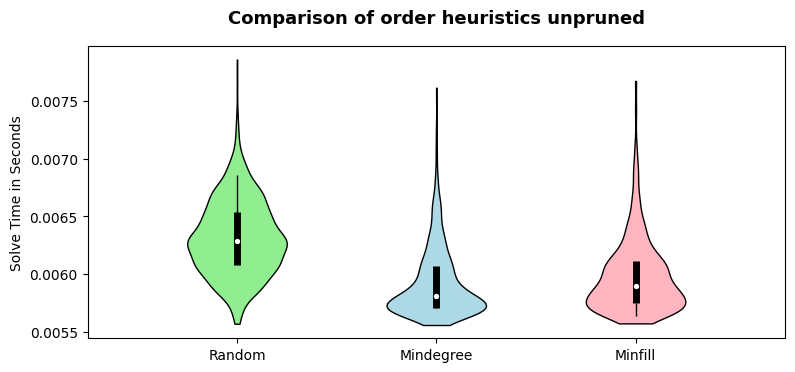

In [177]:
# Seperate plots for pruned vs. unpruned for each order heuristic

# Function to set the style of the boxplot
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('')

# Create the test data
data1 = [random_NOTpruned['time'].tolist(), mindegree_NOTpruned['time'].tolist(), minfill_NOTpruned['time'].tolist()]     

# Create a figure instance
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(9, 4), sharey=True)

# Create the boxplot
ax1.set_title('Comparison of order heuristics unpruned', fontsize=13, fontweight='bold', y=1.05)
ax1.set_ylabel('Solve Time in Seconds')
parts1 = ax1.violinplot(
        data1, showmeans=False, showmedians=False,
        showextrema=False)

# Fill with colors
colors = ['lightgreen', 'lightblue', 'lightpink']
for bplot in parts1:
    for patch, color in zip(parts1['bodies'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_alpha(1)

# Create the boxplot    
quartile1, medians, quartile3 = np.percentile(data1, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data1, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

# Add the scatter points
inds = np.arange(1, len(medians) + 1)
ax1.scatter(inds, medians, marker='o', color='white', s=8, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax1.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# Set style for the axes
labels = ['Random', 'Mindegree', 'Minfill']
for ax in [ax1]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()


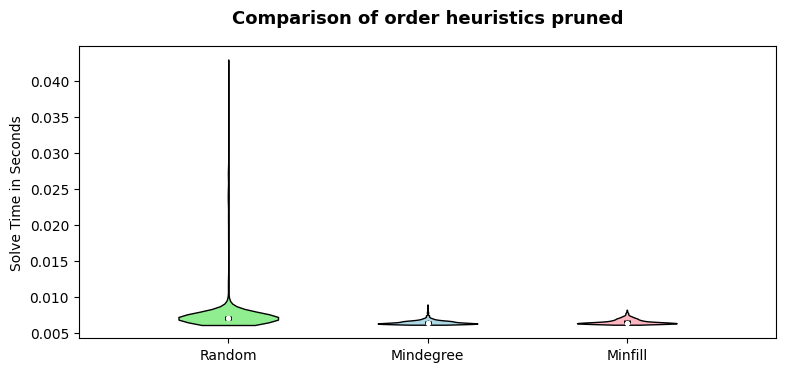

In [178]:
# Seperate plots for pruned vs. unpruned for each order heuristic

# Function to set the style of the boxplot
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('')

# Create the test data
data1 = [random_pruned['time'].tolist(), mindegree_pruned['time'].tolist(), minfill_pruned['time'].tolist()]     

# Create a figure instance
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(9, 4), sharey=True)

# Create the boxplot
ax1.set_title('Comparison of order heuristics pruned',fontsize=13, fontweight='bold', y=1.05)
ax1.set_ylabel('Solve Time in Seconds')
parts1 = ax1.violinplot(
        data1, showmeans=False, showmedians=False,
        showextrema=False)

# Fill with colors
colors = ['lightgreen', 'lightblue', 'lightpink']
for bplot in parts1:
    for patch, color in zip(parts1['bodies'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_alpha(1)

# Create the boxplot    
quartile1, medians, quartile3 = np.percentile(data1, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data1, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

# Add the scatter points
inds = np.arange(1, len(medians) + 1)
ax1.scatter(inds, medians, marker='o', color='white', s=8, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax1.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# Set style for the axes
labels = ['Random', 'Mindegree', 'Minfill']
for ax in [ax1]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()



---

##### Single plots for pruned vs. unpruned for each of the order heuristics, in the following order:
1. Random
2. Mindegree
3. Minfill

---

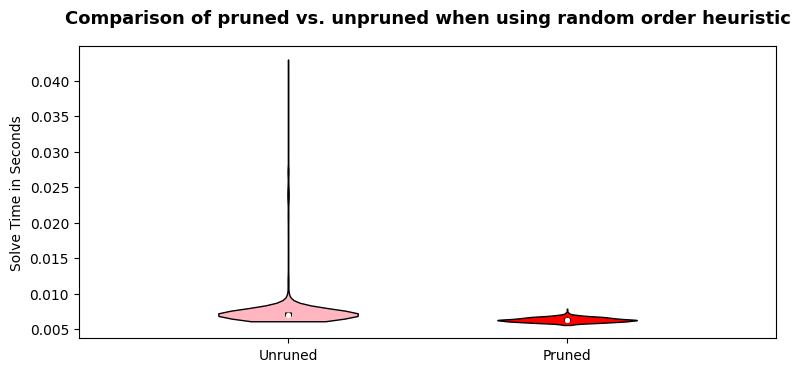

In [179]:
# Seperate plots for pruned vs. unpruned for each order heuristic

# Function to set the style of the boxplot
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('')

# Create the test data
data1 = [random_pruned['time'].tolist(), random_NOTpruned['time'].tolist()]       

# Create a figure instance
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(9, 4), sharey=True)

# Create the boxplot
ax1.set_title('Comparison of pruned vs. unpruned when using random order heuristic', fontsize=13, fontweight='bold', y=1.05)
ax1.set_ylabel('Solve Time in Seconds')
parts1 = ax1.violinplot(
        data1, showmeans=False, showmedians=False,
        showextrema=False)

# Fill with colors
colors = ['lightpink', 'red']
for bplot in parts1:
    for patch, color in zip(parts1['bodies'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_alpha(1)

# Create the boxplot    
quartile1, medians, quartile3 = np.percentile(data1, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data1, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

# Add the scatter points
inds = np.arange(1, len(medians) + 1)
ax1.scatter(inds, medians, marker='o', color='white', s=8, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax1.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# Set style for the axes
labels = ['Unruned', 'Pruned']
for ax in [ax1]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()


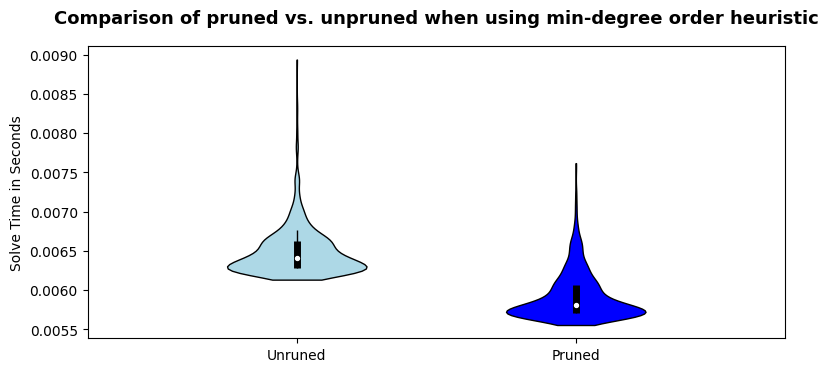

In [180]:
# Seperate plots for pruned vs. unpruned for each order heuristic

# Create the test data
data1 = [mindegree_pruned['time'].tolist(), mindegree_NOTpruned['time'].tolist()]       

# Create a figure instance
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(9, 4), sharey=True)

# Create the boxplot
ax1.set_title('Comparison of pruned vs. unpruned when using min-degree order heuristic', fontsize=13, fontweight='bold', y=1.05)
ax1.set_ylabel('Solve Time in Seconds')
parts1 = ax1.violinplot(
        data1, showmeans=False, showmedians=False,
        showextrema=False)

# Fill with colors
colors = ['lightblue', 'blue']
for bplot in parts1:
    for patch, color in zip(parts1['bodies'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_alpha(1)

# Create the boxplot    
quartile1, medians, quartile3 = np.percentile(data1, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data1, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

# Add the scatter points
inds = np.arange(1, len(medians) + 1)
ax1.scatter(inds, medians, marker='o', color='white', s=8, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax1.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# Set style for the axes
labels = ['Unruned', 'Pruned']
for ax in [ax1]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()


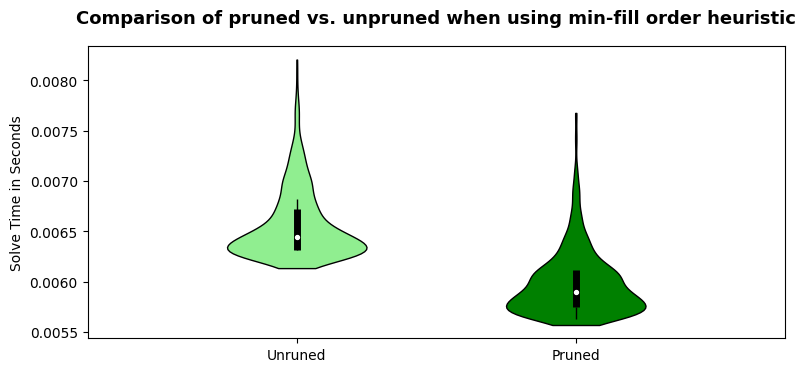

In [181]:
# Seperate plots for pruned vs. unpruned for each order heuristic

# Create the test data
data1 = [minfill_pruned['time'].tolist(), minfill_NOTpruned['time'].tolist()]       

# Create a figure instance
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(9, 4), sharey=True)

# Create the boxplot
ax1.set_title('Comparison of pruned vs. unpruned when using min-fill order heuristic', fontsize=13, fontweight='bold', y=1.05)
ax1.set_ylabel('Solve Time in Seconds')
parts1 = ax1.violinplot(
        data1, showmeans=False, showmedians=False,
        showextrema=False)

# Fill with colors
colors = ['lightgreen', 'green']
for bplot in parts1:
    for patch, color in zip(parts1['bodies'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_alpha(1)

# Create the boxplot    
quartile1, medians, quartile3 = np.percentile(data1, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data1, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

# Add the scatter points
inds = np.arange(1, len(medians) + 1)
ax1.scatter(inds, medians, marker='o', color='white', s=8, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax1.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# Set style for the axes
labels = ['Unruned', 'Pruned']
for ax in [ax1]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()


---

##### Plots for the order heuristics comparison for unpruned BNs

---

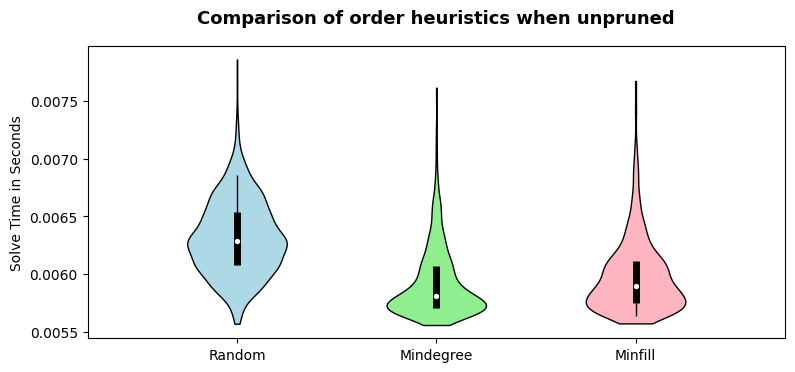

In [182]:
# Create the test data
data1 = [random_NOTpruned['time'].tolist(), mindegree_NOTpruned['time'].tolist(), minfill_NOTpruned['time'].tolist()]       

# Create a figure instance
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(9, 4), sharey=True)

# Create the boxplot
ax1.set_title('Comparison of order heuristics when unpruned', fontsize=13, fontweight='bold', y=1.05)
ax1.set_ylabel('Solve Time in Seconds')
parts1 = ax1.violinplot(
        data1, showmeans=False, showmedians=False,
        showextrema=False)

# Fill with colors
colors = ['lightblue', 'lightgreen', 'lightpink']
for bplot in parts1:
    for patch, color in zip(parts1['bodies'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_alpha(1)

# Create the boxplot    
quartile1, medians, quartile3 = np.percentile(data1, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data1, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

# Add the scatter points
inds = np.arange(1, len(medians) + 1)
ax1.scatter(inds, medians, marker='o', color='white', s=8, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax1.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# Set style for the axes
labels = ['Random', 'Mindegree', 'Minfill']
for ax in [ax1]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

---

##### Plots for the order heuristics comparison for pruned BNs

---

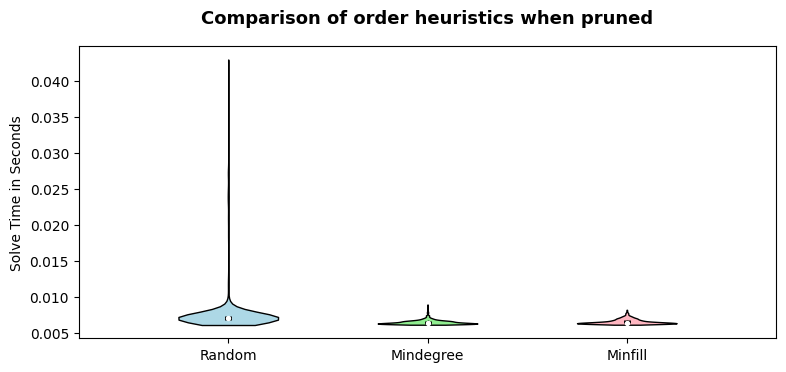

In [183]:
# Create the test data
data1 = [random_pruned['time'].tolist(), mindegree_pruned['time'].tolist(), minfill_pruned['time'].tolist()]       

# Create a figure instance
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(9, 4), sharey=True)

# Create the boxplot
ax1.set_title('Comparison of order heuristics when pruned', fontsize=13, fontweight='bold', y=1.05)
ax1.set_ylabel('Solve Time in Seconds')
parts1 = ax1.violinplot(
        data1, showmeans=False, showmedians=False,
        showextrema=False)

# Fill with colors
colors = ['lightblue', 'lightgreen', 'lightpink']
for bplot in parts1:
    for patch, color in zip(parts1['bodies'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_alpha(1)

# Create the boxplot    
quartile1, medians, quartile3 = np.percentile(data1, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data1, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

# Add the scatter points
inds = np.arange(1, len(medians) + 1)
ax1.scatter(inds, medians, marker='o', color='white', s=8, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax1.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# Set style for the axes
labels = ['Random', 'Mindegree', 'Minfill']
for ax in [ax1]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()



> #### **Conclusion:** As can be observed the minfill order heuristic takes the least amount of solving time, followed by the mindegree heuristic and lastly the random heuristic for both unpruned networks as well as pruned networks



## Experiment 2: Comparison of MAP and MEP for pruned and unpruned networks

### 1. Maximum a Posteriori (MAP)

In a Bayesian Network $(G, \Theta)$ over variables $X$, $MAP$ variables $M$, and some evidence $e$, inference by variable elimination is a process of evaluating the expressions illustrated below. Hence, eliminate variables by first summing out (e.i., marginalization) all the $non-MAP$ variables, and then maximizing out the $MAP$ variables provides the most probable states of the $MAP$ variables given the specific set of evidence $e$. 

$$MAP = \max_{M} \sum_{X - M} \prod_{X}\Theta_{X \mid U} \lambda_{X}$$

The example tested: "What is the maximum a posteriori event when it is known that the lights are on?". 


### 1. Most-Probable-Explanation (MPE)

Most-Probable-Explanation:] The MPE is the variable that has the highest probability $X$ given some evidence $e$. Here all variables $X$ that are not in $e$ form the query $Q$ and thus all variables are maximized out. 

$$MPE = \max_{M} \prod_{X} \Theta_{X \mid U} \lambda_{X}$$

The example tested: "What is the most probable explanation for the lights being on?".

In [184]:
# An example of MAP inference
bn.md_MAP_MPE(['light-on', 'family-out', 'dog-out', 'hear-bark', 'bowel_problem'], {'light-on': True}, "MPE", "random", prune = False)


family-out        True
dog-out           True
light-on          True
p             0.280202
Name: 7, dtype: object

In [185]:
# An example of MPE inference
bn.md_MAP_MPE(['light-on', 'family-out', 'dog-out', 'hear-bark', 'bowel_problem'], {'light-on': True}, "MAP", "random", prune = False)

family-out        True
dog-out           True
light-on          True
p             0.280202
Name: 7, dtype: object


---

##### We ran 1000 experiments for retrieving a pruned versus an unpruned network for each of the three order heuristics for either MAP inference or MPE inference.


---

In [186]:
def MAP_vs_MPE(query, evidence, method, heuristic, pruned = True):
    times = []
    for i in range(1000):

        # Load the network
        net = BayesNet()
        net.load_from_bifxml(path)
        bn_pruned = BNReasoner(net)
        bn_unpruned = BNReasoner(net)

        # Start the experiment 
        if pruned == True:
            start = time.process_time()
            sol_pruned = bn_pruned.md_MAP_MPE(query, evidence, method, heuristic, pruned)
            end = time.process_time()
            times.append(end-start)
        else:
            start = time.process_time()
            sol_unpruned = bn_unpruned.md_MAP_MPE(query, evidence, method, heuristic, pruned)
            end = time.process_time()
            times.append(end-start)

    return pd.DataFrame(times, columns = ['time'])

# MAP: Random Heuristic
MAP_random_pruned = MAP_vs_MPE(['light-on', 'family-out', 'dog-out', 'hear-bark', 'bowel_problem'], {'light-on': True}, "MAP", "random", pruned = True)
MAP_random_NOTpruned = MAP_vs_MPE(['light-on', 'family-out', 'dog-out', 'hear-bark', 'bowel_problem'], {'light-on': True}, "MAP", "random", pruned = False)

# MAP: Min_degree Heuristic
MAP_mindegree_pruned = MAP_vs_MPE(['light-on', 'family-out', 'dog-out', 'hear-bark', 'bowel_problem'], {'light-on': True}, "MAP", "mindegree", pruned = True)
MAP_mindegree_NOTpruned = MAP_vs_MPE(['light-on', 'family-out', 'dog-out', 'hear-bark', 'bowel_problem'], {'light-on': True}, "MAP", "mindegree", pruned = False)

# MAP: Min_fill Heuristic
MAP_minfill_pruned = MAP_vs_MPE(['light-on', 'family-out', 'dog-out', 'hear-bark', 'bowel_problem'], {'light-on': True}, "MAP", "minfill", pruned = True)
MAP_minfill_NOTpruned = MAP_vs_MPE(['light-on', 'family-out', 'dog-out', 'hear-bark', 'bowel_problem'], {'light-on': True}, "MAP", "minfill", pruned = False)

# MPE: Random Heuristic
MPE_random_pruned = MAP_vs_MPE(['light-on', 'family-out', 'dog-out', 'hear-bark', 'bowel_problem'], {'light-on': True}, "MPE", "random", pruned = True)
MPE_random_NOTpruned = MAP_vs_MPE(['light-on', 'family-out', 'dog-out', 'hear-bark', 'bowel_problem'], {'light-on': True}, "MPE", "random", pruned = False)

# MPE: Min_degree Heuristic
MPE_mindegree_pruned = MAP_vs_MPE(['light-on', 'family-out', 'dog-out', 'hear-bark', 'bowel_problem'], {'light-on': True}, "MPE", "mindegree", pruned = True)
MPE_mindegree_NOTpruned = MAP_vs_MPE(['light-on', 'family-out', 'dog-out', 'hear-bark', 'bowel_problem'], {'light-on': True}, "MPE", "mindegree", pruned = False)

# MPE: Min_fill Heuristic
MPE_minfill_pruned = MAP_vs_MPE(['light-on', 'family-out', 'dog-out', 'hear-bark', 'bowel_problem'], {'light-on': True}, "MPE", "minfill", pruned = True)
MPE_minfill_NOTpruned = MAP_vs_MPE(['light-on', 'family-out', 'dog-out', 'hear-bark', 'bowel_problem'], {'light-on': True}, "MPE", "minfill", pruned = False)

## Significance Tests

---

##### We then test the runtime of the 1000 experiments for the following comparisons:
1. MAP vs. MPE for each of the order heuristics and unpruned networks
2. MAP vs. MPE for each of the order heuristics and pruned networks


However, before we do that we test if the data is normally distributed with a Shapiro-Wilk test, followed up with Density plots (where the data should be normally distributed), and Q-Q plots where the red dots should be on the blue line in order for the data to be noramlly distributed.

---

In [187]:
#### COMPARISON Mindegree vs. Minfill Pruned vs not pruned ####

# Shapiro wilk test (significant p-value => not normally distributed)
stats.shapiro(MAP_random_pruned['time'])   
stats.shapiro(MAP_random_NOTpruned['time'])    
stats.shapiro(MAP_mindegree_pruned['time'])      
stats.shapiro(MAP_mindegree_NOTpruned['time'])       
stats.shapiro(MAP_minfill_pruned['time'])
stats.shapiro(MAP_minfill_NOTpruned['time'])

stats.shapiro(MPE_random_pruned['time'])   
stats.shapiro(MPE_random_NOTpruned['time'])    
stats.shapiro(MPE_mindegree_pruned['time'])      
stats.shapiro(MPE_mindegree_NOTpruned['time'])       
stats.shapiro(MPE_minfill_pruned['time'])
stats.shapiro(MPE_minfill_NOTpruned['time'])

# Print the results
print("Results of the pruned random heuristic normally distributed?: ", stats.shapiro(MAP_random_pruned['time'])[1] > 0.05, ", Because p-value: ", stats.shapiro(MAP_random_pruned['time'])[1])
print("Results of the unpruned random heuristic normally distributed: ", stats.shapiro(MAP_random_NOTpruned['time'])[1] > 0.05, ", Because p-value: ", stats.shapiro(MAP_random_NOTpruned['time'])[1])
print("Results of the pruned mindegree heuristic normally distributed: ", stats.shapiro(MAP_mindegree_pruned['time'])[1] > 0.05, ", Because p-value: ", stats.shapiro(MAP_mindegree_pruned['time'])[1])
print("Results of the unpruned mindegree heuristic normally distributed: ", stats.shapiro(MAP_mindegree_NOTpruned['time'])[1] > 0.05, ", Because p-value: ", stats.shapiro(MAP_mindegree_NOTpruned['time'])[1])
print("Results of the pruned minfill heuristic normally distributed: ", stats.shapiro(MAP_minfill_pruned['time'])[1] > 0.05, ", Because p-value: ", stats.shapiro(MAP_minfill_pruned['time'])[1])
print("Results of the unpruned minfill heuristic normally distributed: ", stats.shapiro(MAP_minfill_NOTpruned['time'])[1] > 0.05, ", Because p-value: ", stats.shapiro(MAP_minfill_NOTpruned['time'])[1])

print("Results of the pruned random heuristic normally distributed?: ", stats.shapiro(MPE_random_pruned['time'])[1] > 0.05, ", Because p-value: ", stats.shapiro(MAP_random_pruned['time'])[1])
print("Results of the unpruned random heuristic normally distributed: ", stats.shapiro(MPE_random_NOTpruned['time'])[1] > 0.05, ", Because p-value: ", stats.shapiro(MAP_random_NOTpruned['time'])[1])
print("Results of the pruned mindegree heuristic normally distributed: ", stats.shapiro(MPE_mindegree_pruned['time'])[1] > 0.05, ", Because p-value: ", stats.shapiro(MAP_mindegree_pruned['time'])[1])
print("Results of the unpruned mindegree heuristic normally distributed: ", stats.shapiro(MPE_mindegree_NOTpruned['time'])[1] > 0.05, ", Because p-value: ", stats.shapiro(MAP_mindegree_NOTpruned['time'])[1])
print("Results of the pruned minfill heuristic normally distributed: ", stats.shapiro(MPE_minfill_pruned['time'])[1] > 0.05, ", Because p-value: ", stats.shapiro(MAP_minfill_pruned['time'])[1])
print("Results of the unpruned minfill heuristic normally distributed: ", stats.shapiro(MPE_minfill_NOTpruned['time'])[1] > 0.05, ", Because p-value: ", stats.shapiro(MAP_minfill_NOTpruned['time'])[1])

Results of the pruned random heuristic normally distributed?:  False , Because p-value:  0.0
Results of the unpruned random heuristic normally distributed:  False , Because p-value:  1.1450121905544592e-26
Results of the pruned mindegree heuristic normally distributed:  False , Because p-value:  3.065365300701439e-31
Results of the unpruned mindegree heuristic normally distributed:  False , Because p-value:  2.2159306976232327e-27
Results of the pruned minfill heuristic normally distributed:  False , Because p-value:  1.7873279932289553e-32
Results of the unpruned minfill heuristic normally distributed:  False , Because p-value:  2.7276596727554e-28
Results of the pruned random heuristic normally distributed?:  False , Because p-value:  0.0
Results of the unpruned random heuristic normally distributed:  False , Because p-value:  1.1450121905544592e-26
Results of the pruned mindegree heuristic normally distributed:  False , Because p-value:  3.065365300701439e-31
Results of the unpruned

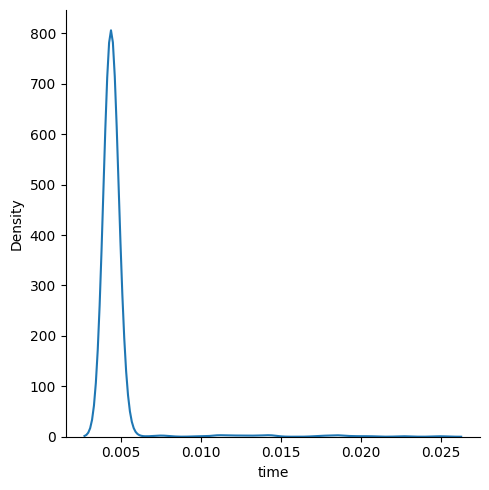

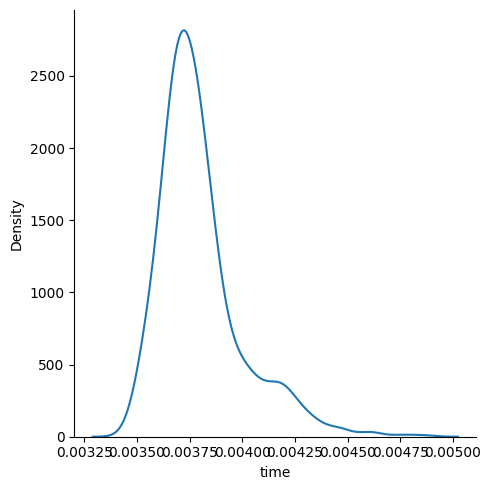

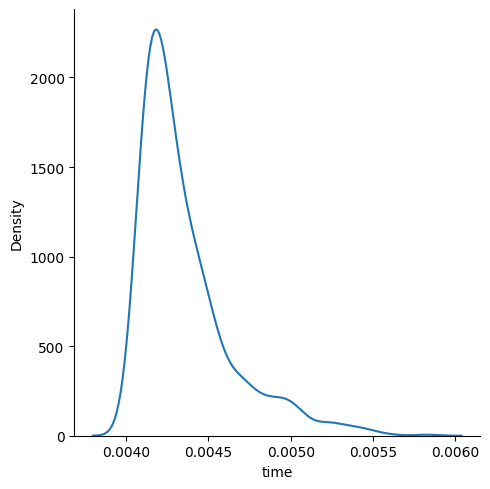

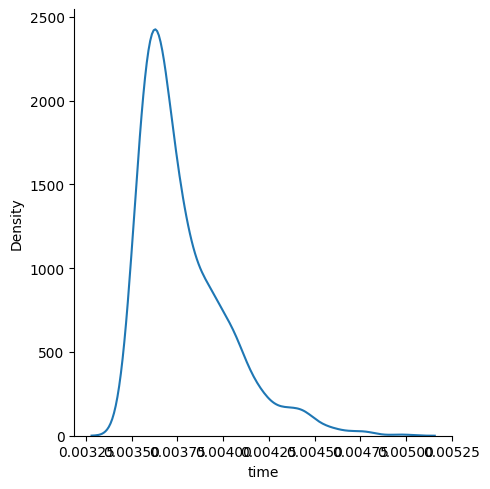

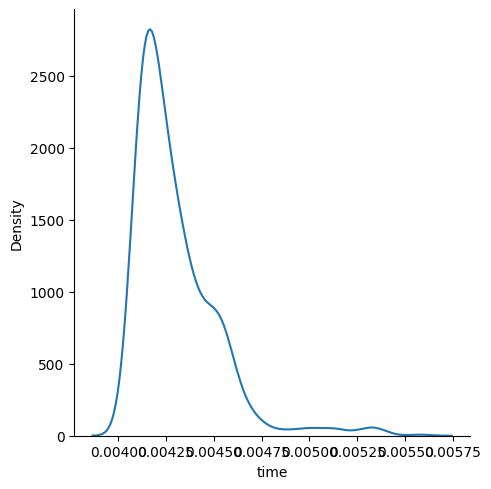

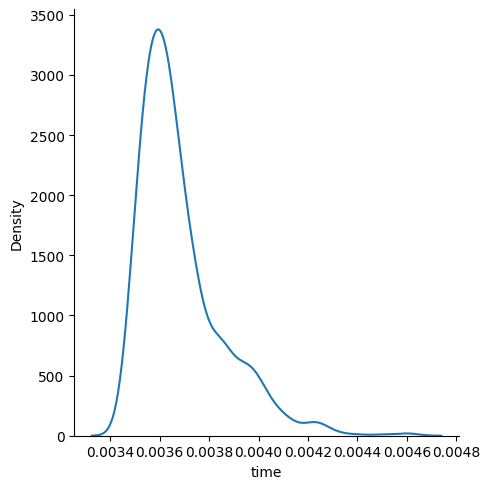

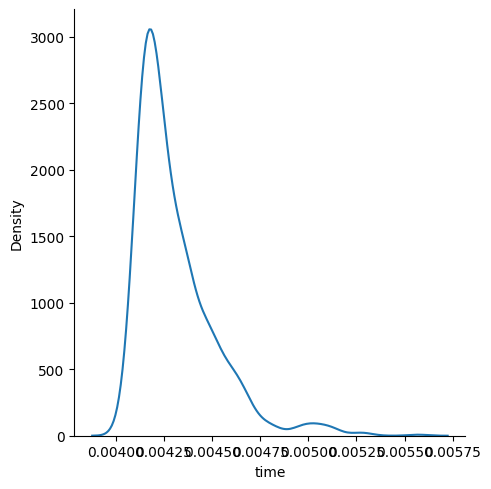

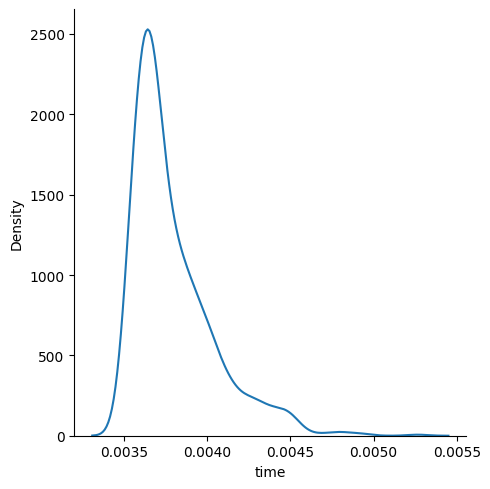

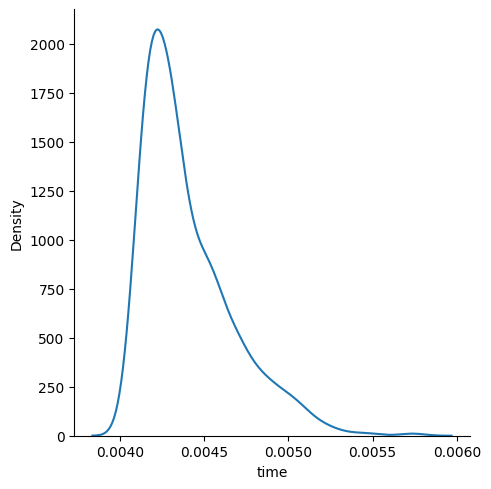

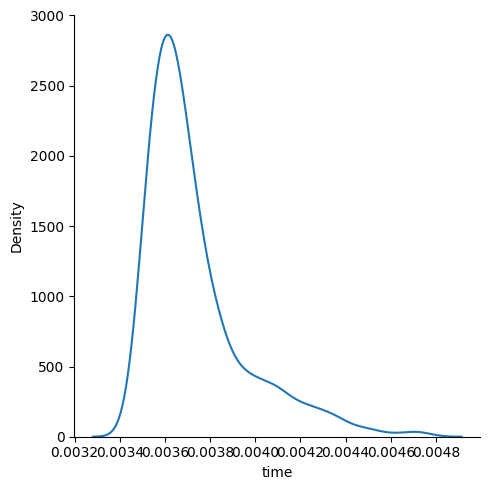

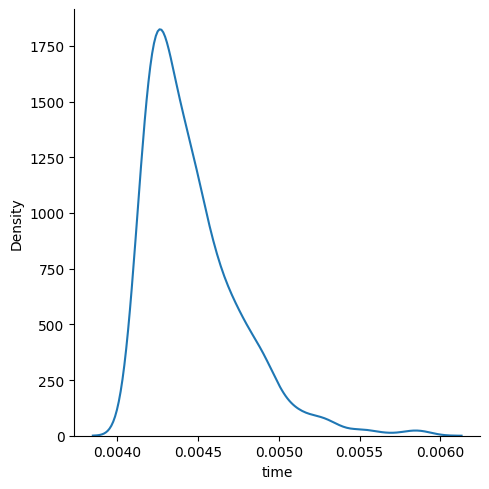

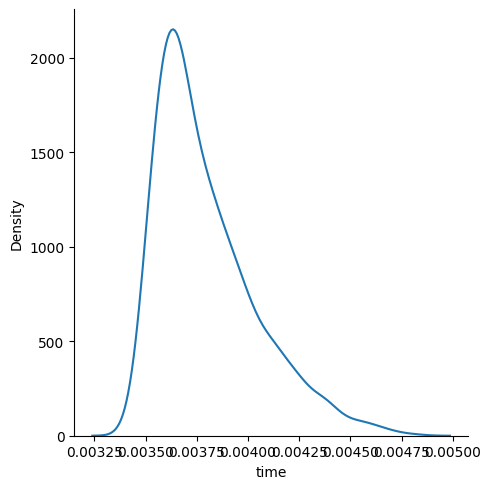

In [188]:
# Density plots --> To check if the data is normally distributed
sns.displot(MAP_random_pruned, x = "time", kind="kde")
sns.displot(MAP_random_NOTpruned, x = "time", kind="kde")
sns.displot(MAP_mindegree_pruned, x = "time", kind="kde")
sns.displot(MAP_mindegree_NOTpruned, x = "time", kind="kde")
sns.displot(MAP_minfill_pruned, x = "time", kind="kde")
sns.displot(MAP_minfill_NOTpruned, x = "time", kind="kde")

sns.displot(MPE_random_pruned, x = "time", kind="kde")
sns.displot(MPE_random_NOTpruned, x = "time", kind="kde")
sns.displot(MPE_mindegree_pruned, x = "time", kind="kde")
sns.displot(MPE_mindegree_NOTpruned, x = "time", kind="kde")
sns.displot(MPE_minfill_pruned, x = "time", kind="kde")
sns.displot(MPE_minfill_NOTpruned, x = "time", kind="kde")

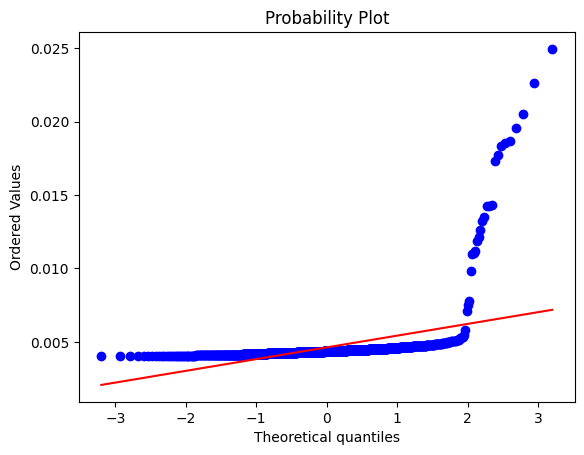

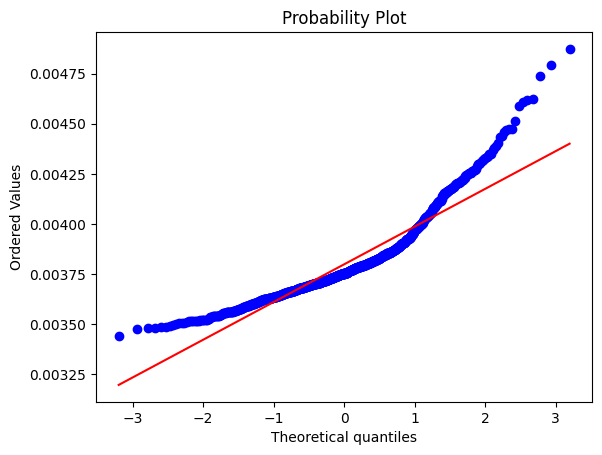

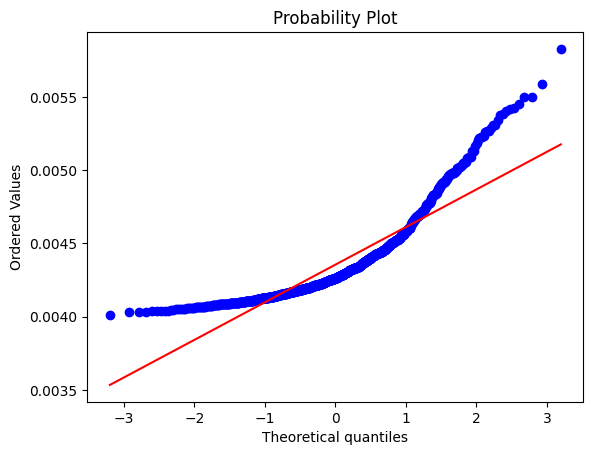

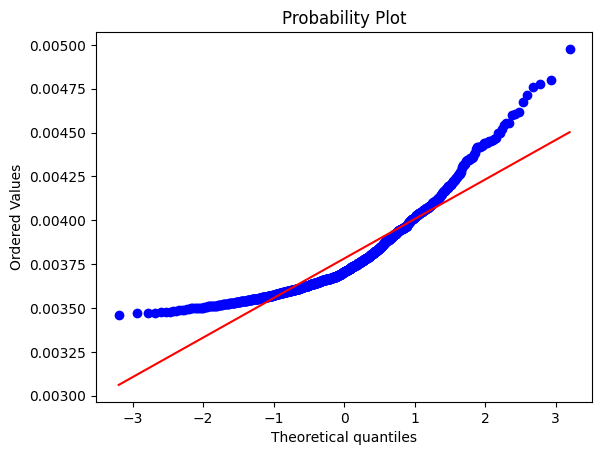

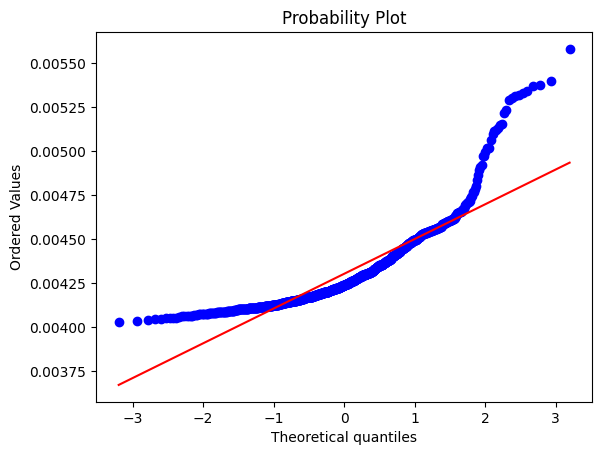

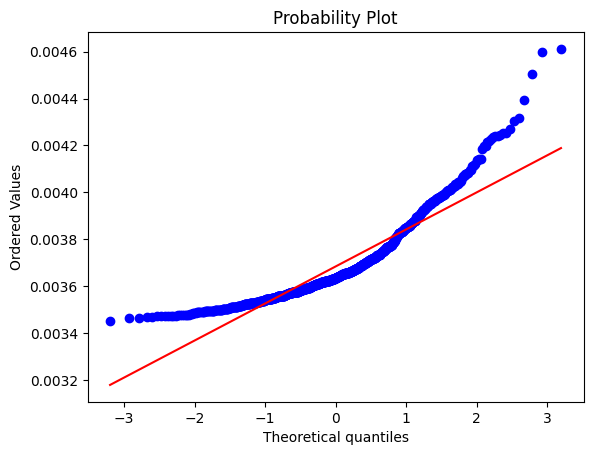

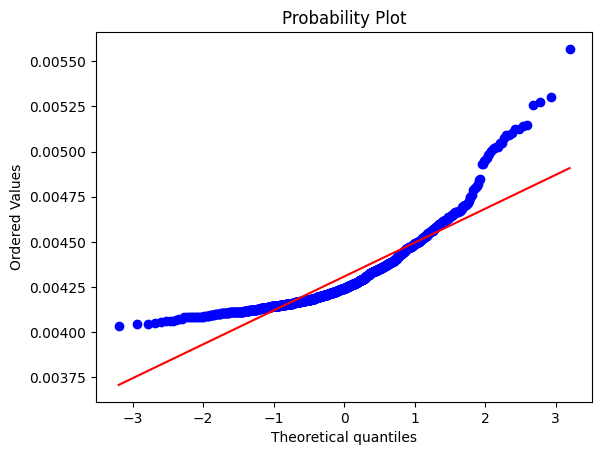

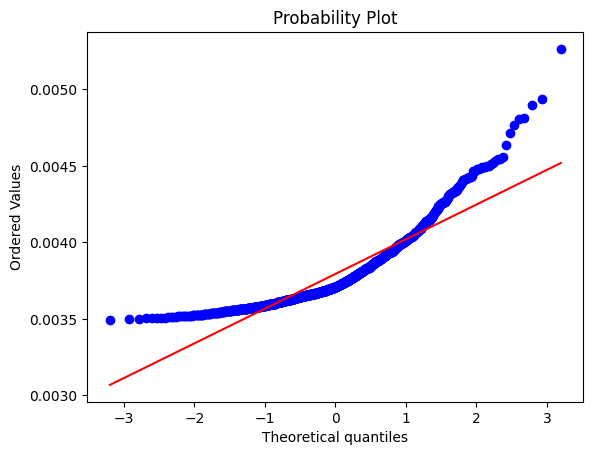

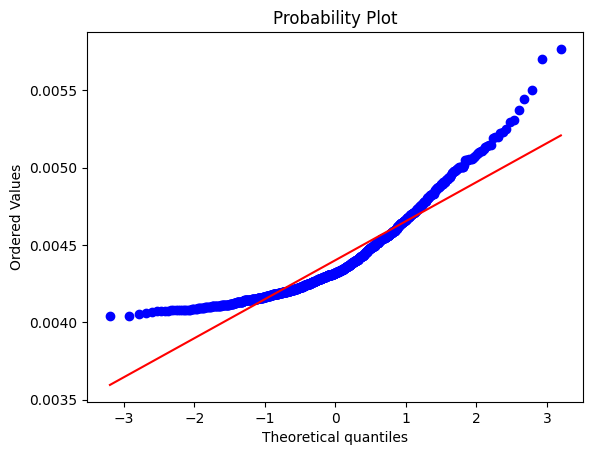

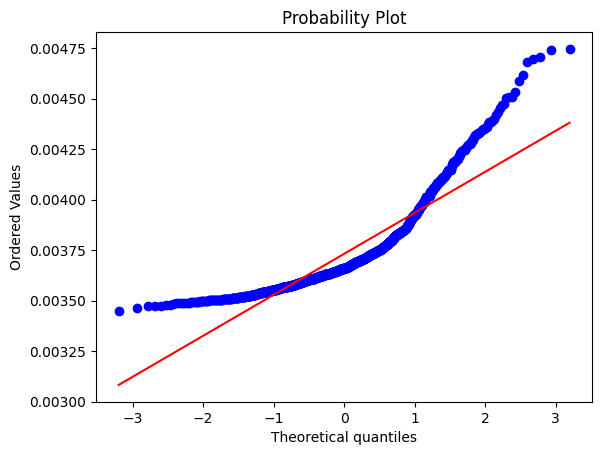

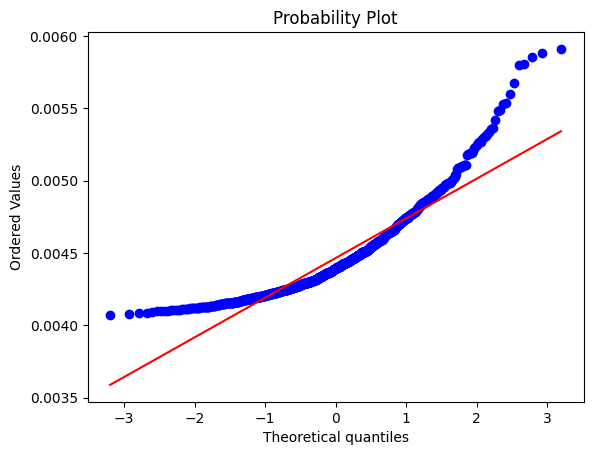

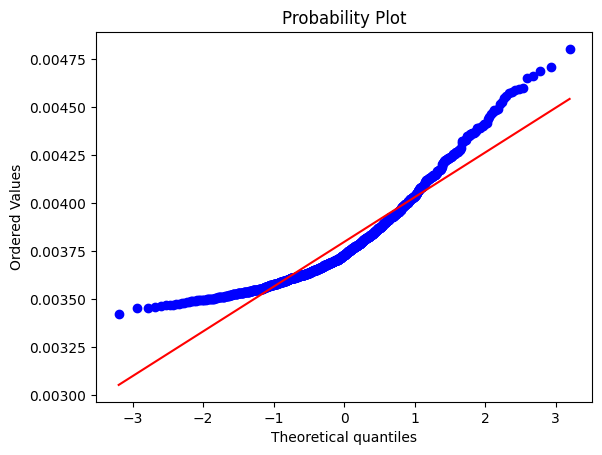

In [189]:
# Check the Q-Q plots --> Also to check if the data is normally distributed
stats.probplot(MAP_random_pruned['time'], dist="norm", plot=plt)
plt.show()
stats.probplot(MAP_random_NOTpruned['time'], dist="norm", plot=plt)
plt.show()
stats.probplot(MAP_mindegree_pruned['time'], dist="norm", plot=plt)
plt.show()
stats.probplot(MAP_mindegree_NOTpruned['time'], dist="norm", plot=plt)
plt.show()
stats.probplot(MAP_minfill_pruned['time'], dist="norm", plot=plt)
plt.show()
stats.probplot(MAP_minfill_NOTpruned['time'], dist="norm", plot=plt)
plt.show()

stats.probplot(MPE_random_pruned['time'], dist="norm", plot=plt)
plt.show()
stats.probplot(MPE_random_NOTpruned['time'], dist="norm", plot=plt)
plt.show()
stats.probplot(MPE_mindegree_pruned['time'], dist="norm", plot=plt)
plt.show()
stats.probplot(MPE_mindegree_NOTpruned['time'], dist="norm", plot=plt)
plt.show()
stats.probplot(MPE_minfill_pruned['time'], dist="norm", plot=plt)
plt.show()
stats.probplot(MPE_minfill_NOTpruned['time'], dist="norm", plot=plt)
plt.show()

## Results

---

##### Results of the following comparisons:
1. MAP vs. MPE for each of the order heuristics and unpruned networks
2. MAP vs. MPE for each of the order heuristics and pruned networks


---

In [190]:
# Significance test for all comparisons

# MAP vs. MPE -> unpruned
ranksums(MAP_random_NOTpruned['time'], MPE_random_NOTpruned['time'])
ranksums(MAP_mindegree_NOTpruned['time'], MPE_mindegree_NOTpruned['time'])
ranksums(MAP_minfill_NOTpruned['time'], MPE_minfill_NOTpruned['time'])

display(pd.DataFrame([ranksums(MAP_random_NOTpruned['time'], MPE_random_NOTpruned['time']),
                      ranksums(MAP_mindegree_NOTpruned['time'], MPE_mindegree_NOTpruned['time']),
                      ranksums(MAP_minfill_NOTpruned['time'], MPE_minfill_NOTpruned['time'])], 
                      index = ['random: MAP vs. MPE', 'mindegree: MAP vs. MPE', 'minfill: MAP vs. MPE'], 
                      columns = ['statistic', 'p-value']).style.set_caption('Comparison MAP vs. MPE unpruned'))


# MAP vs. MPE -> pruned
ranksums(MAP_random_pruned['time'], MPE_random_pruned['time'])
ranksums(MAP_mindegree_pruned['time'], MPE_mindegree_pruned['time'])
ranksums(MAP_minfill_pruned['time'], MPE_minfill_pruned['time'])

display(pd.DataFrame([ranksums(MAP_random_pruned['time'], MPE_random_pruned['time']),
                      ranksums(MAP_mindegree_pruned['time'], MPE_mindegree_pruned['time']),
                      ranksums(MAP_minfill_pruned['time'], MPE_minfill_pruned['time'])], 
                      index = ['random: MAP vs. MPE', 'mindegree: MAP vs. MPE', 'minfill: MAP vs. MPE'], 
                      columns = ['statistic', 'p-value']).style.set_caption('Comparison MAP vs. MPE pruned'))

,statistic,p-value
random: MAP vs. MPE,3.861058,0.000113
mindegree: MAP vs. MPE,5.509762,0.000000
minfill: MAP vs. MPE,-11.385778,0.000000


,statistic,p-value
random: MAP vs. MPE,9.496970,0.000000
mindegree: MAP vs. MPE,-5.777434,0.000000
minfill: MAP vs. MPE,-15.324895,0.000000


## Plots of the results

---

##### We then plotted the results for the following comparisons
1. MAP vs. MPE for each of the order heuristics and unpruned networks
2. MAP vs. MPE for each of the order heuristics and pruned networks

---

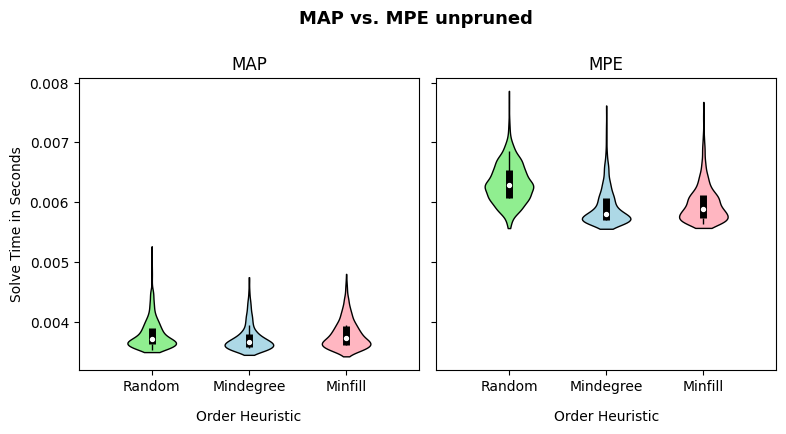

In [191]:
# Plot pruned vs. unpruned

# Function to calculate the quartiles
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])
    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

# Function to set the style of the boxplot
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Order Heuristic', labelpad=12)

# Create the test data
data1 = [MAP_random_NOTpruned['time'].tolist(), MAP_mindegree_NOTpruned['time'].tolist(), MAP_minfill_NOTpruned['time'].tolist()] 
data1 = [MPE_random_NOTpruned['time'].tolist(), MPE_mindegree_NOTpruned['time'].tolist(), MPE_minfill_NOTpruned['time'].tolist()]     

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)
fig.suptitle('MAP vs. MPE unpruned', fontsize=13, fontweight='bold', y=1.05)

ax1.set_title('MAP')
ax1.set_ylabel('Solve Time in Seconds')
parts1 = ax1.violinplot(
        data1, showmeans=False, showmedians=False,
        showextrema=False)

# fill with colors
colors = ['lightgreen', 'lightblue', 'lightpink']
for bplot in parts1:
    for patch, color in zip(parts1['bodies'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_alpha(1)
    
quartile1, medians, quartile3 = np.percentile(data1, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data1, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax1.scatter(inds, medians, marker='o', color='white', s=8, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax1.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

ax2.set_title('MPE')
parts2 = ax2.violinplot(
        data2, showmeans=False, showmedians=False,
        showextrema=False)

# Fill with colors
colors = ['lightgreen', 'lightblue', 'lightpink']
for bplot in parts2:
    for patch, color in zip(parts2['bodies'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data2, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data2, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax2.scatter(inds, medians, marker='o', color='white', s=8, zorder=3)
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax2.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# Set style for the axes
labels = ['Random', 'Mindegree', 'Minfill']
for ax in [ax1, ax2]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

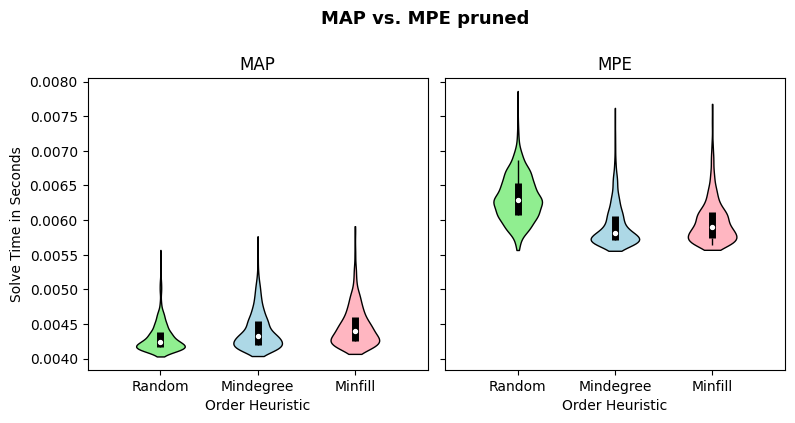

In [192]:
# Plot pruned vs. unpruned

# Function to calculate the quartiles
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])
    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

# Function to set the style of the boxplot
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Order Heuristic')

# Create the test data
data1 = [MAP_random_pruned['time'].tolist(), MAP_mindegree_pruned['time'].tolist(), MAP_minfill_pruned['time'].tolist()] 
data1 = [MPE_random_pruned['time'].tolist(), MPE_mindegree_pruned['time'].tolist(), MPE_minfill_pruned['time'].tolist()]     

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)
fig.suptitle('MAP vs. MPE pruned', fontsize=13, fontweight='bold', y=1.05)

ax1.set_title('MAP')
ax1.set_ylabel('Solve Time in Seconds')
parts1 = ax1.violinplot(
        data1, showmeans=False, showmedians=False,
        showextrema=False)

# fill with colors
colors = ['lightgreen', 'lightblue', 'lightpink']
for bplot in parts1:
    for patch, color in zip(parts1['bodies'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_alpha(1)
    
quartile1, medians, quartile3 = np.percentile(data1, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data1, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax1.scatter(inds, medians, marker='o', color='white', s=8, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax1.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

ax2.set_title('MPE')
parts2 = ax2.violinplot(
        data2, showmeans=False, showmedians=False,
        showextrema=False)

# Fill with colors
colors = ['lightgreen', 'lightblue', 'lightpink']
for bplot in parts2:
    for patch, color in zip(parts2['bodies'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data2, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data2, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax2.scatter(inds, medians, marker='o', color='white', s=8, zorder=3)
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax2.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# Set style for the axes
labels = ['Random', 'Mindegree', 'Minfill']
for ax in [ax1, ax2]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()



> #### **Conclusion:** As can be observed the MAP inference required significantly less computational time as compared to MPE inference. This was the case for all the order heuristics and irrespective of unrpuned or pruned networks. 
